In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# read dataset


In [2]:
df=pd.read_csv('Wine_clust.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# data preprocessing

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
#Checking the shape of the dataset

df.shape

(178, 13)

In [5]:
#Checking datatypes
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [6]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [7]:
#Checking null or missing values

df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
#This describes the stat behind the data

df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


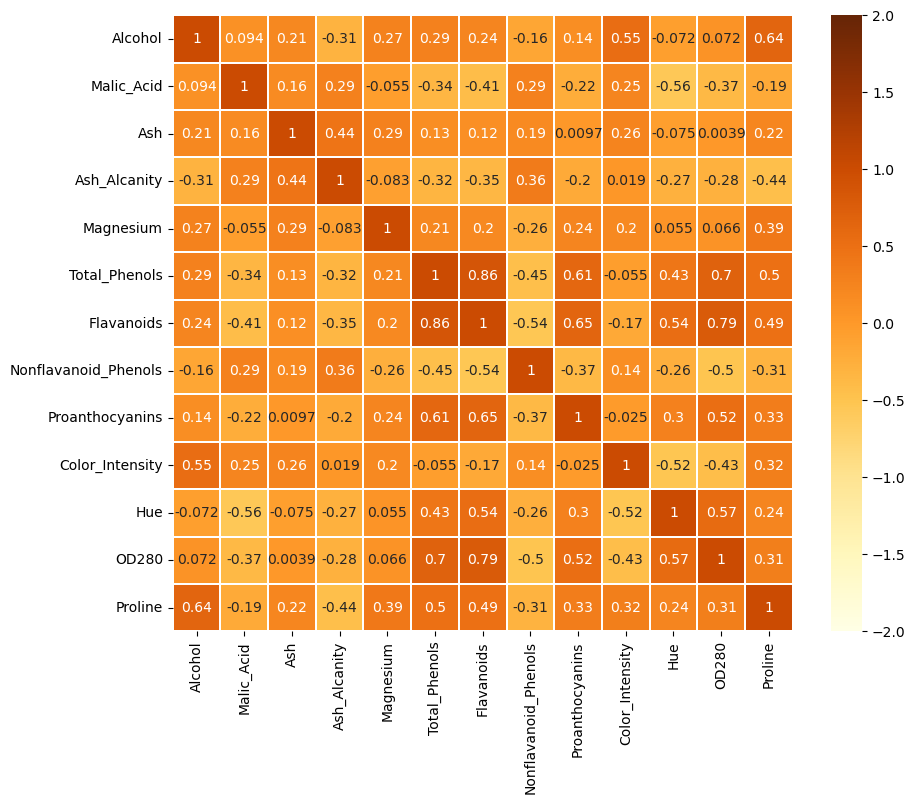

In [10]:
#Checking Correlation between columns
corrmatrix=df.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix,annot=True,vmin=-2,vmax=2,linewidth=0.2,cmap='YlOrBr')
plt.show()

# outliers

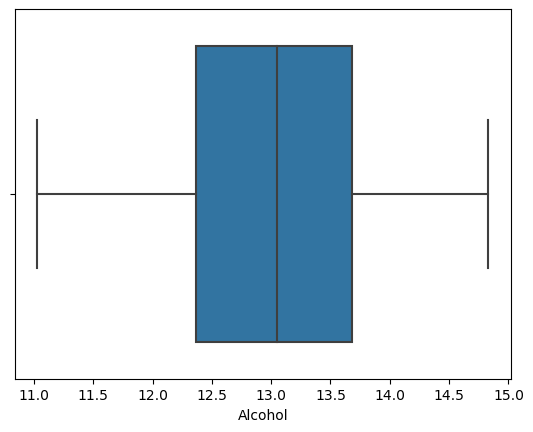

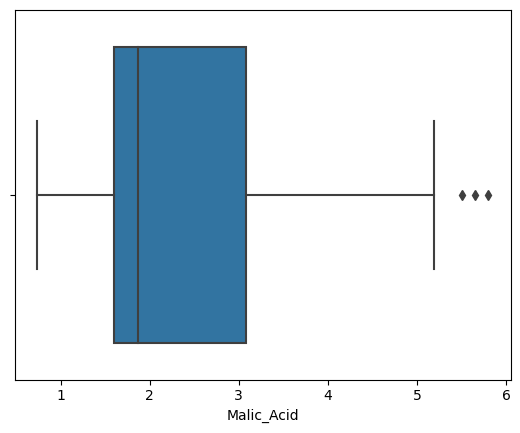

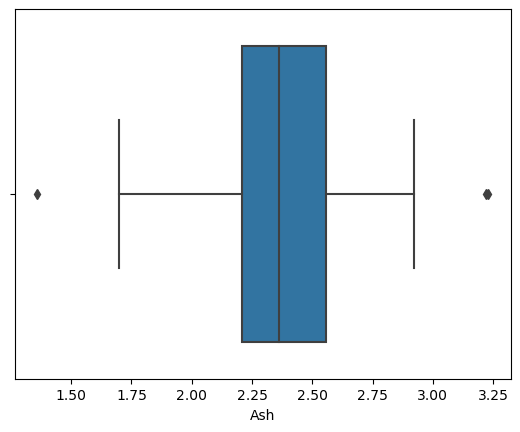

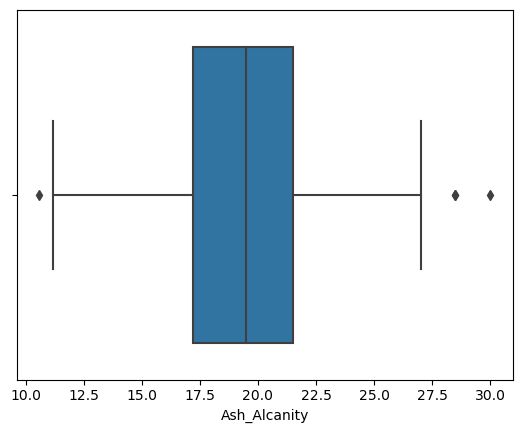

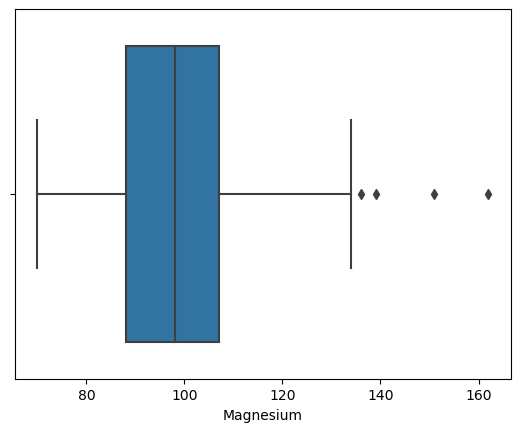

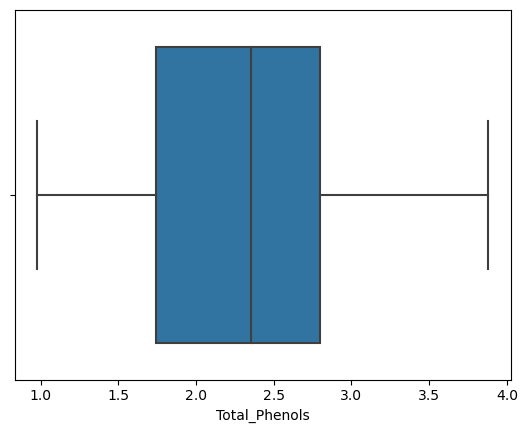

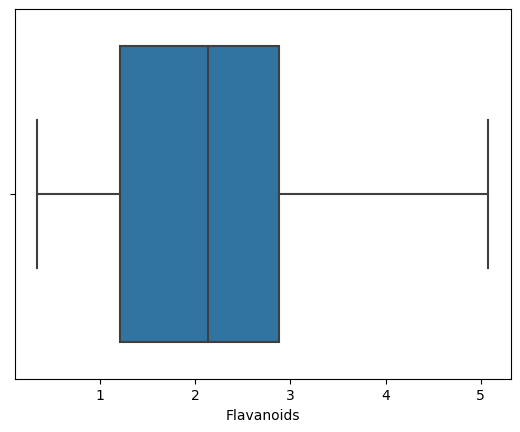

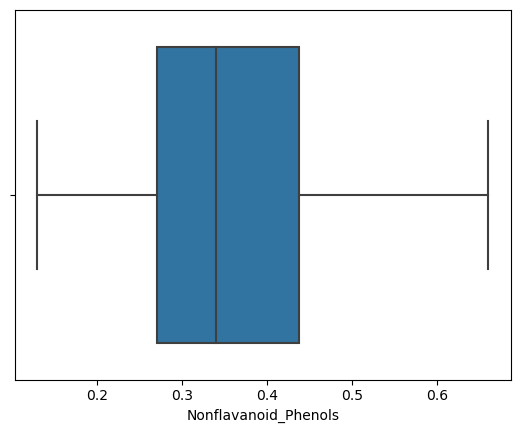

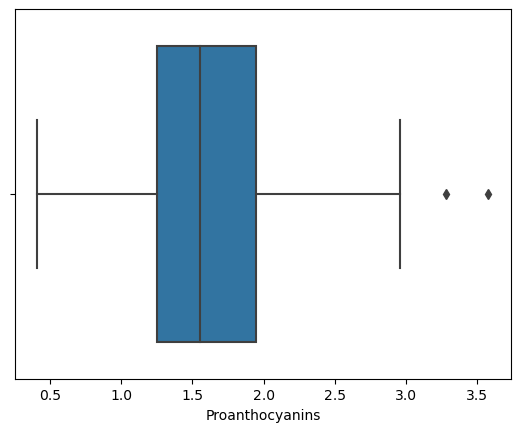

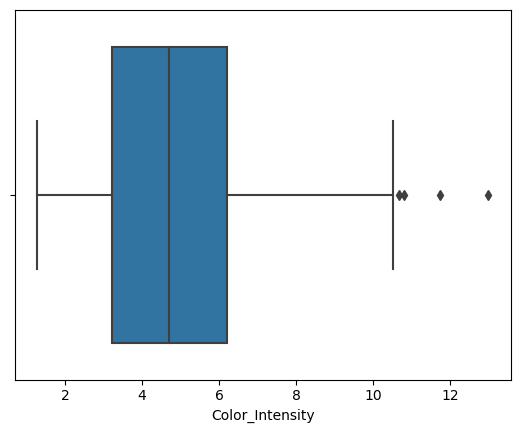

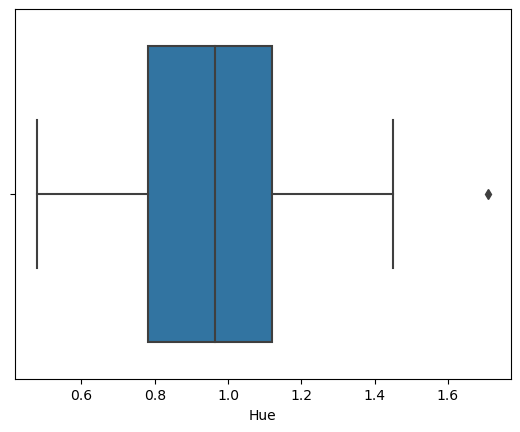

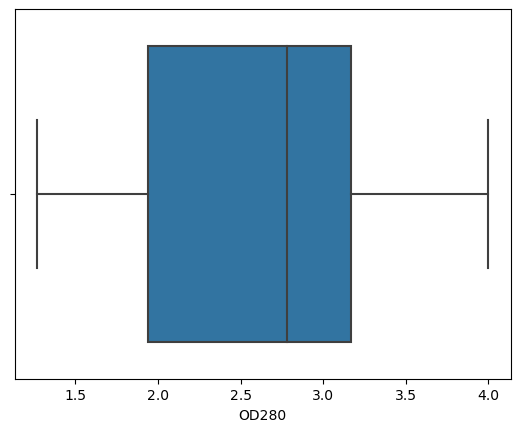

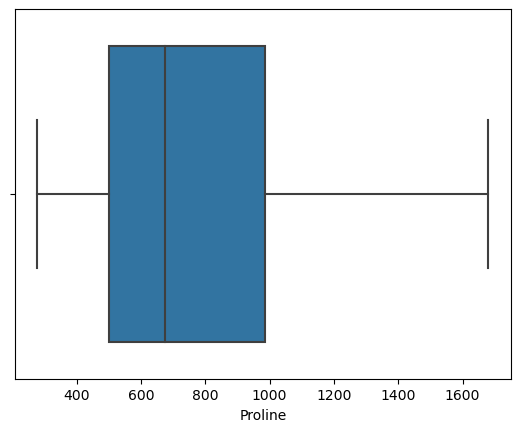

In [11]:
for i in df:
    sns.boxplot(x=df[i])
    plt.show()

In [12]:
#Columns having outliers

#Malic_Acid
#Ash
#Ash_Alcanity
#Magnesium
#Proanthocyanins
#color_intensity
#Hue

In [13]:
IQR=stats.iqr(df.Malic_Acid,interpolation='midpoint')
IQR

1.46

In [14]:
Q1=df.Malic_Acid.quantile(0.25)
Q3=df.Malic_Acid.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-0.5874999999999999, 5.2725)

In [15]:
df.loc[df.Malic_Acid<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [16]:
df.loc[df.Malic_Acid>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
123,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740


# removing outliers

In [17]:
df.loc[df['Malic_Acid']>max_limit,'Malic_Acid']=np.median(df.Malic_Acid)

In [18]:
df.loc[df['Malic_Acid']>max_limit,'Malic_Acid']=np.median(df.Malic_Acid)
df.loc[df.Malic_Acid>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [19]:
df.loc[df['Malic_Acid']<min_limit,'Malic_Acid']=np.median(df.Malic_Acid)
df.loc[df.Malic_Acid<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [20]:
IQR=stats.iqr(df.Ash,interpolation='midpoint')
IQR

0.34499999999999975

In [21]:
Q1=df.Ash.quantile(0.25)
Q3=df.Ash.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(1.6925000000000003, 3.0749999999999997)

In [22]:
df.loc[df.Ash<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520


In [23]:
df.loc[df.Ash>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
121,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


In [24]:
df.loc[df['Ash']>max_limit,'Ash']=np.median(df.Ash)
df.loc[df.Ash>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [25]:
df.loc[df['Ash']<min_limit,'Ash']=np.median(df.Ash)
df.loc[df.Ash<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [26]:
IQR=stats.iqr(df.Ash_Alcanity,interpolation='midpoint')
IQR

4.300000000000001

In [27]:
Q1=df.Ash_Alcanity.quantile(0.25)
Q3=df.Ash_Alcanity.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(10.749999999999998, 27.950000000000003)

In [28]:
df.loc[df.Ash_Alcanity<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
59,12.37,0.94,2.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520


In [29]:
df.loc[df.Ash_Alcanity>max_limit]


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
73,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
121,11.56,2.05,2.36,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
127,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466


In [30]:
df.loc[df['Ash_Alcanity']>max_limit,'Ash_Alcanity']=np.median(df.Ash_Alcanity)
df.loc[df.Ash_Alcanity>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [31]:
df.loc[df['Ash_Alcanity']<min_limit,'Ash_Alcanity']=np.median(df.Ash_Alcanity)
df.loc[df.Ash_Alcanity<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [32]:
IQR=stats.iqr(df.Magnesium,interpolation='midpoint')
IQR

19.0

In [33]:
Q1=df.Magnesium.quantile(0.25)
Q3=df.Magnesium.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(59.5, 135.5)

In [34]:
df.loc[df.Magnesium<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [35]:
df.loc[df.Magnesium>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,12.99,1.67,2.60,19.5,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937


In [36]:
df.loc[df['Magnesium']>max_limit,'Magnesium']=np.median(df.Magnesium)
df.loc[df.Magnesium>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [37]:
df.loc[df['Magnesium']<min_limit,'Magnesium']=np.median(df.Magnesium)
df.loc[df.Magnesium<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [38]:
IQR=stats.iqr(df.Proanthocyanins,interpolation='midpoint')
IQR

0.7

In [39]:
Q1=df.Proanthocyanins.quantile(0.25)
Q3=df.Proanthocyanins.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(0.20000000000000018, 3.0)

In [40]:
df.loc[df.Proanthocyanins<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [41]:
df.loc[df.Proanthocyanins>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
95,12.47,1.52,2.20,19.0,98,2.50,2.27,0.32,3.28,2.6,1.16,2.63,937
110,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.9,0.75,2.81,562


In [42]:
df.loc[df['Proanthocyanins']>max_limit,'Proanthocyanins']=np.median(df.Proanthocyanins)
df.loc[df.Proanthocyanins>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [43]:
df.loc[df['Proanthocyanins']<min_limit,'Proanthocyanins']=np.median(df.Proanthocyanins)
df.loc[df.Proanthocyanins<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [44]:
IQR=stats.iqr(df.Color_Intensity,interpolation='midpoint')
IQR

2.97

In [45]:
Q1=df.Color_Intensity.quantile(0.25)
Q3=df.Color_Intensity.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-1.2350000000000003, 10.655000000000001)

In [46]:
df.loc[df.Color_Intensity<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [47]:

df.loc[df.Color_Intensity>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
151,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
166,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695


In [48]:
df.loc[df['Color_Intensity']>max_limit,'Color_Intensity']=np.median(df.Color_Intensity)
df.loc[df.Color_Intensity>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [49]:
df.loc[df['Color_Intensity']<min_limit,'Color_Intensity']=np.median(df.Color_Intensity)
df.loc[df.Color_Intensity<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [50]:
IQR=stats.iqr(df.Hue,interpolation='midpoint')
IQR

0.3350000000000001

In [51]:
Q1=df.Hue.quantile(0.25)
Q3=df.Hue.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(0.2799999999999998, 1.6225000000000003)

In [52]:
df.loc[df.Hue<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [53]:
df.loc[df.Hue>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
115,11.03,1.51,2.2,21.5,85,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407


In [54]:
df.loc[df['Hue']>max_limit,'Hue']=np.median(df.Hue)
df.loc[df.Hue>max_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


In [55]:
df.loc[df['Hue']<min_limit,'Hue']=np.median(df.Hue)
df.loc[df.Hue<min_limit]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline


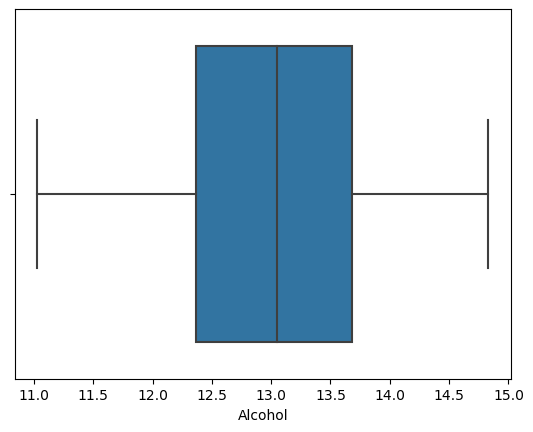

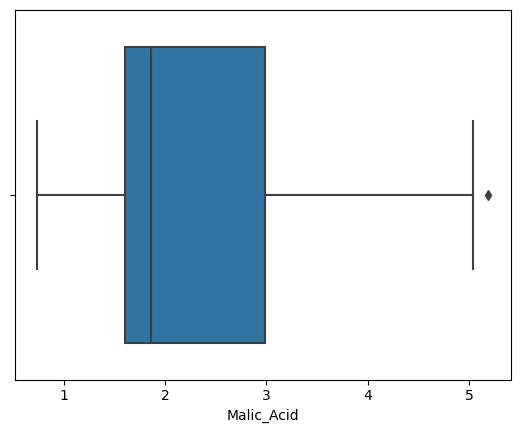

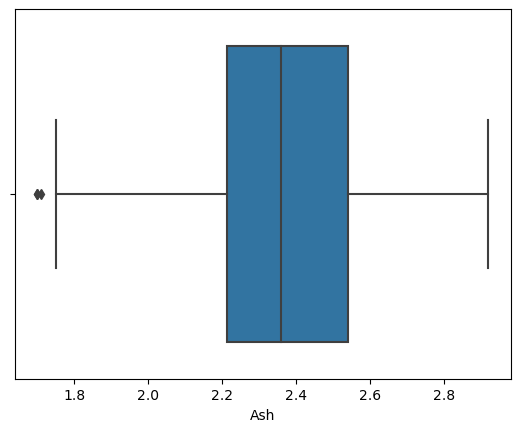

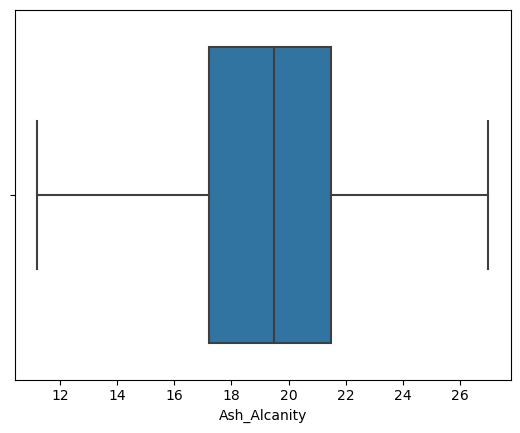

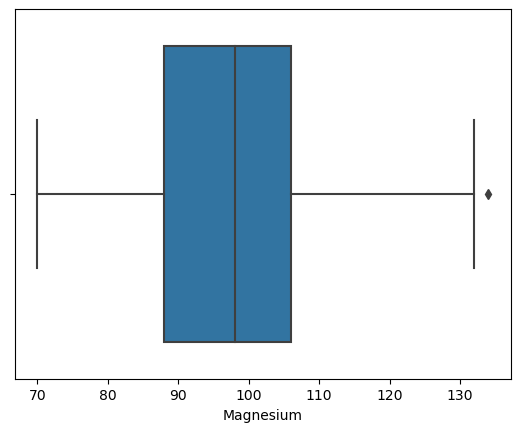

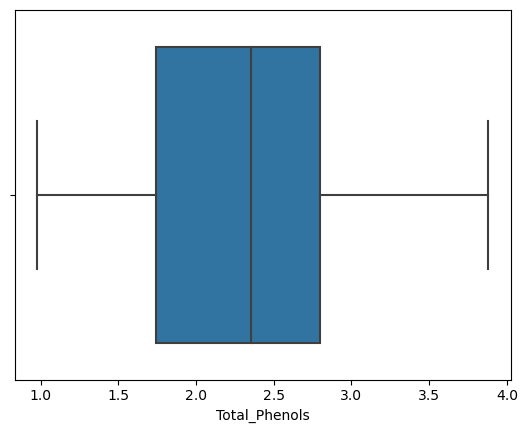

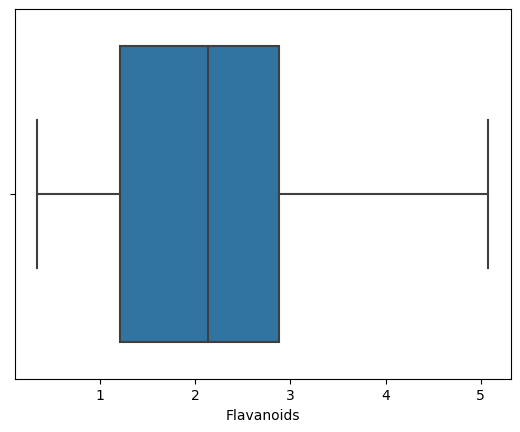

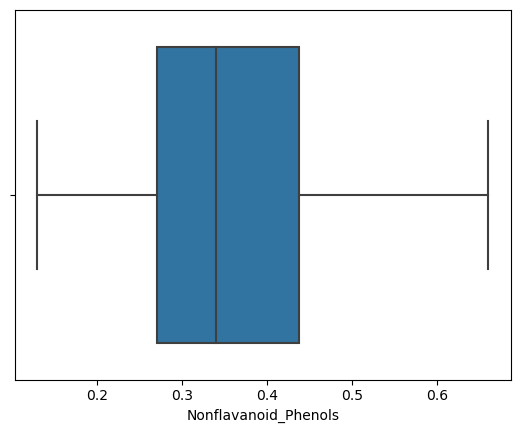

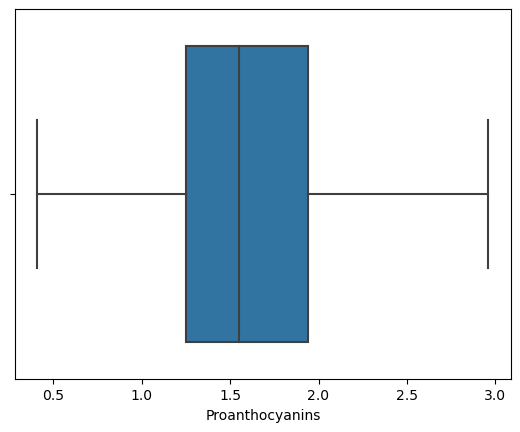

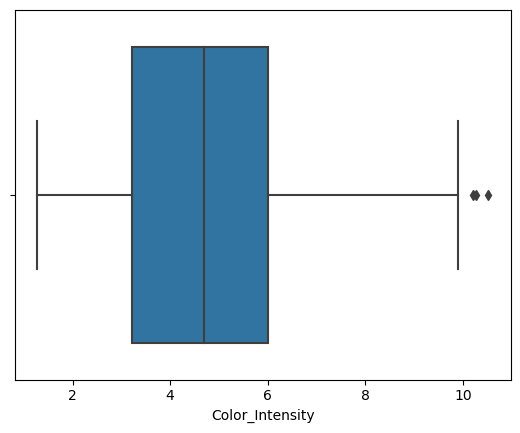

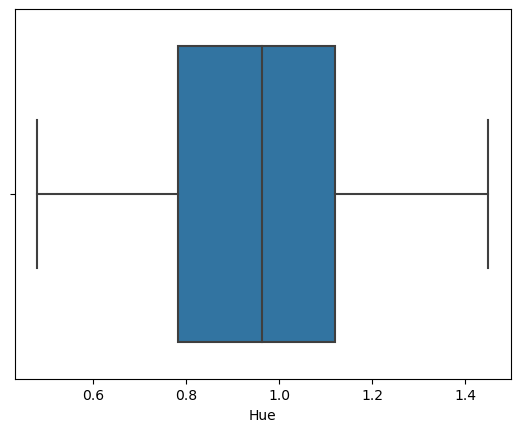

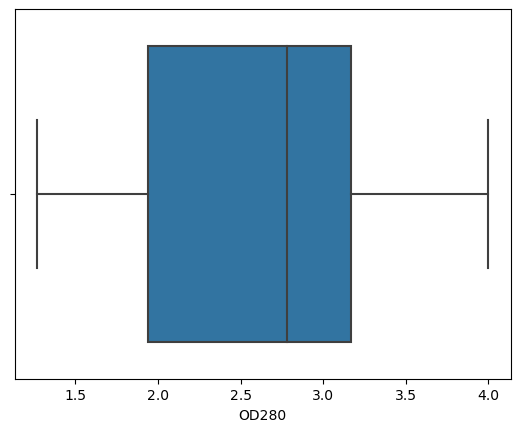

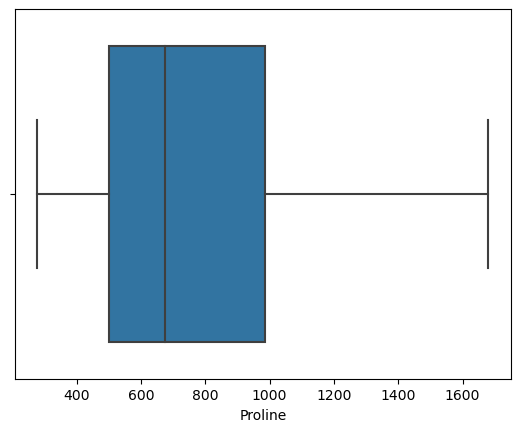

In [56]:
#After Removing Outliers, plotting Boxplot

for i in df:
    sns.boxplot(x=df[i])
    plt.show()

In [57]:
from sklearn.preprocessing import Normalizer
data=pd.DataFrame(Normalizer().fit_transform(df),columns=df.columns)

In [59]:
#Clustering Models
#1.K-Means Clustering

In [60]:
from sklearn.cluster import KMeans

#Creating an emplty list to store the wcss score(Within Cluster Sum of Sqaures)

wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    #Fitting the data
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

0.5886575263415078
0.20496266004616087
0.10027762490394913
0.056661117995180886
0.037852162531607836
0.029055234463056565
0.023922178837226613
0.020998653390599142
0.01801050897493859
0.016286426997066384


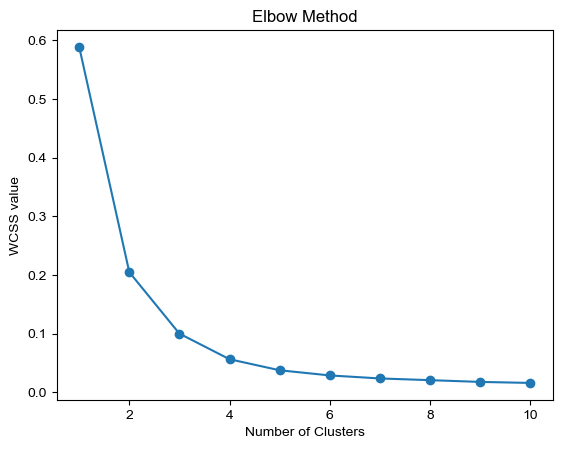

In [61]:
#Plotting

plt.plot(range(1,11),wcss,marker='o')
sns.set_style('darkgrid')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS value')
plt.show()

In [62]:
#From the elbow method , optimum number of clusters is 3

#KMeans

kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(df)
y_kmeans

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

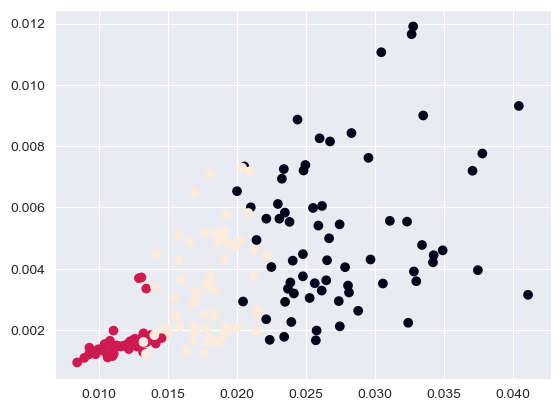

In [63]:
#scatter Plot

plt.scatter(data.iloc[:,0],data.iloc[:,1],c=y_kmeans)

In [64]:
from sklearn.metrics import silhouette_score
silhouette_sc_average=silhouette_score(data,y_kmeans)
silhouette_sc_average

0.3899037834393046

In [65]:
#2.Agglomerative Clustering
#Plotting Dendrograms to find the optimum number of clusters

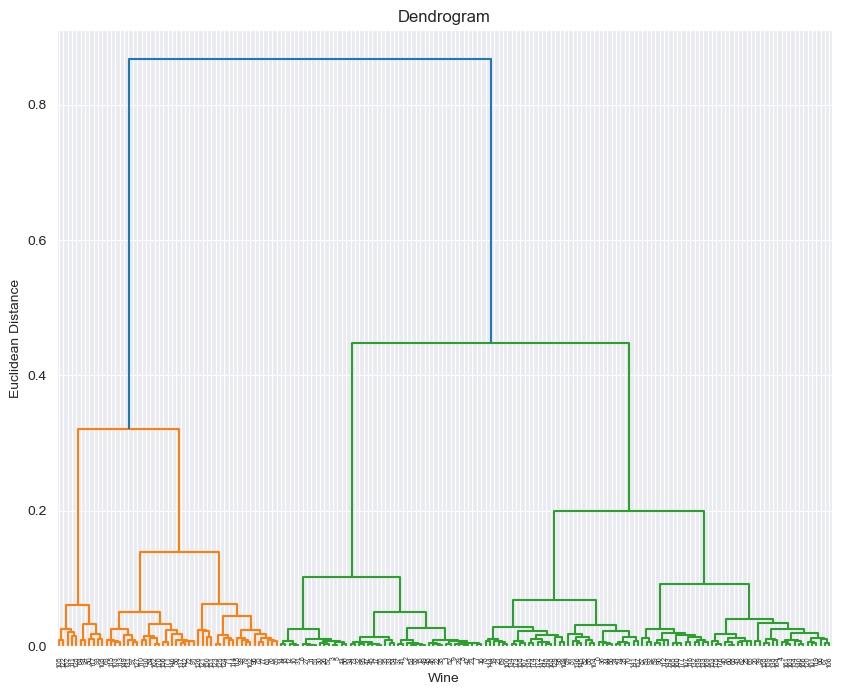

In [66]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,8))
#Creating a variable
dendrogram=sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wine')
plt.ylabel('Euclidean Distance')
plt.show()

In [67]:
#From dendrogram, number of clusters is taken as 3
from sklearn.cluster import AgglomerativeClustering
#Creating Instance
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
#Fitting the model
y_hc=hc.fit_predict(data)
y_hc

array([1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1], dtype=int64)

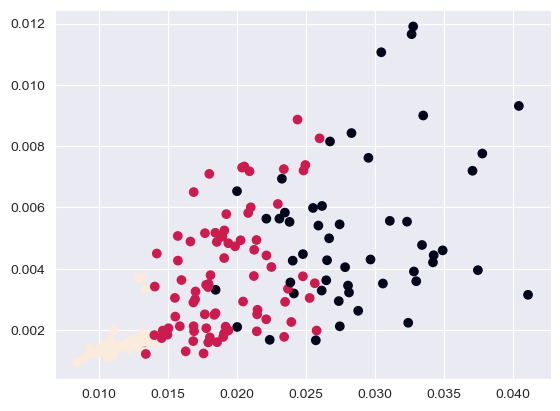

In [68]:
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=y_hc)

In [69]:
#Calculate the Sihouette Score

from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(data,y_hc)
silhouette_avg

0.5142401829144838

In [70]:
#Before doing PCA, we need to scale the data

#Scaling the data using Standard Scaler

from sklearn.preprocessing import StandardScaler

#Creating instance

sc=StandardScaler()
scaled_data=sc.fit_transform(df)
scaled_data

array([[ 1.51861254, -0.5476409 ,  0.27397068, ...,  0.392826  ,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.47949003, -0.90162087, ...,  0.43811587,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.08518858,  1.24687403, ...,  0.34753614,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.95446953, -0.4151692 , ..., -1.6452181 ,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.30911287,  0.03074484, ..., -1.59992823,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.77922444,  1.5306375 , ..., -1.55463836,
        -1.42894777, -0.59516041]])

In [71]:
#Converting array to DataFrame
scaled_data=pd.DataFrame(scaled_data,columns=df.columns)
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,3.991813e-17,-4.266250e-16,1.085274e-16,-5.086443e-16,-2.972030e-16,-4.016762e-16,4.079134e-16,1.132053e-16,-2.993860e-17,6.349478e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.492017e+00,-2.685277e+00,-2.712903e+00,-2.345389e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.164721e+00,-1.736510e+00,-2.143407e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.523012e-01,-6.077230e-01,-7.241731e-01,-8.713549e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.969366e-01,-8.068607e-01,-7.733881e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-3.991694e-01,-9.792801e-03,3.817318e-02,-5.244691e-02,9.595986e-02,1.061497e-01,-1.760948e-01,-3.234761e-02,-1.048319e-01,4.182952e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.912445e-01,7.198847e-01,7.010830e-01,6.026794e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.955522e-01,5.253169e-01,7.551450e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,2.840431e+00,2.260315e+00,2.524085e+00,2.895622e+00,2.539515e+00,3.062832e+00,2.402403e+00,2.594624e+00,2.691304e+00,2.249711e+00,1.960915e+00,2.971473e+00


In [72]:
#PCA

In [73]:
from sklearn.decomposition import PCA
#Doing PCA with the features by specifying the number of components

pca=PCA(n_components=10)

#Fitting

pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
x_pca.shape

(178, 10)

In [75]:
#Checking variance of 10 components

pca.explained_variance_ratio_


array([0.37086336, 0.20332931, 0.0954301 , 0.0694187 , 0.06023354,
       0.04419032, 0.03910542, 0.02895931, 0.02478652, 0.02137276])

In [76]:
#Sum of variance

np.sum(pca.explained_variance_ratio_)

0.9576893475927889

In [77]:
#Kmeans With PCA

In [78]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    #Fitting the data
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

2216.0931503297143
1546.8956907145198
1147.1015070382214
1051.9336175427618
993.76114828535
940.8172504620564
894.7114621936862
847.8755645145789
807.6694708110824
790.5048270437189


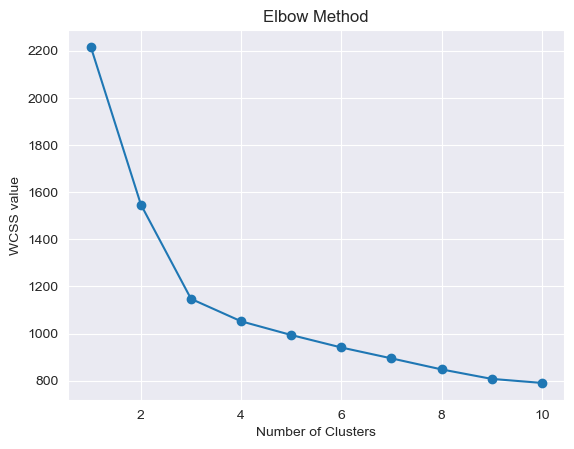

In [79]:
plt.plot(range(1,11),wcss,marker='o')
sns.set_style('darkgrid')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS value')
plt.show()

In [80]:
#Number of optimum clusters is 3
cluster_Kmeans = KMeans(n_clusters=3)
model_kmeans = cluster_Kmeans.fit(x_pca)
kmeans_pca = model_kmeans.labels_
kmeans_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

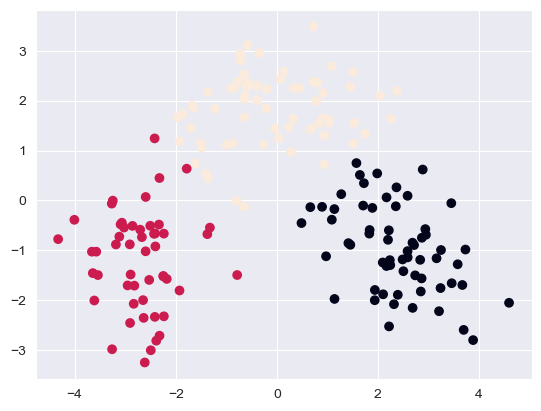

In [81]:
#Scatter Plot
plt.scatter(x_pca[:,0],x_pca[:,1],c=kmeans_pca)

In [82]:
#Agglomerative Clustering with PCA

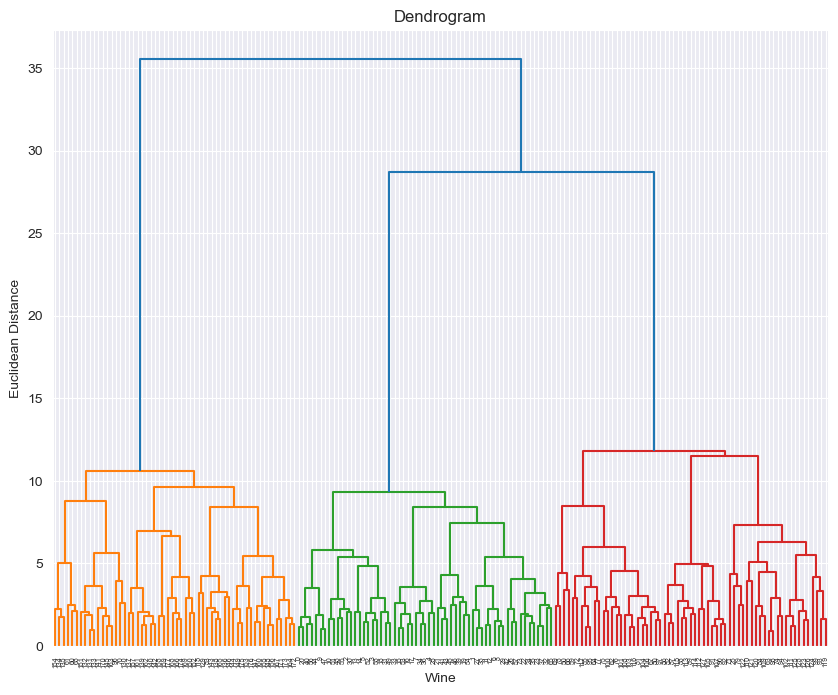

In [83]:
plt.figure(figsize=(10,8))
#Creating a variable
dendrogram=sch.dendrogram(sch.linkage(x_pca,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wine')
plt.ylabel('Euclidean Distance')
plt.show()

In [84]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
model_hc=hc.fit(x_pca)
hc_pca=model_hc.labels_
hc_pca

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

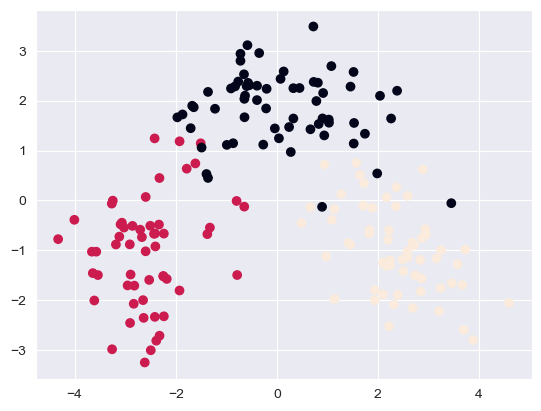

In [85]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=hc_pca)

In [86]:
#DB Scan Clustering(Density-Based Spatial Clustering of Application with Noise)

In [87]:
#Checking the optimal value for epsilon
from sklearn.neighbors import NearestNeighbors

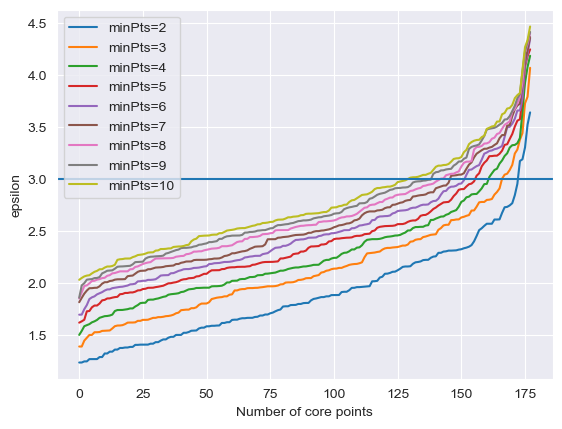

In [88]:
#Creates an instance of the Nearest Neighbors with n_neighbors parameter set to 10
neigh = NearestNeighbors(n_neighbors=10)

#Fits the algorithm to the data
nbrs = neigh.fit(scaled_data)

#This calculate the distances and indices of the nearest neighbors for each data point in the dataset
distances, indices = nbrs.kneighbors(scaled_data)

#for loop iterates over values from 1 to 9 and for each value of k, the distance to the kth nearest neighbor are sorted and plotted on y axis against the number of datapoints in the x -axis.

for k in range(1, 10):
    distances_k = np.sort(distances[:,k], axis=0)
    plt.plot(distances_k, label='minPts=%i' % (k+1))
sns.set_style('darkgrid')
plt.ylabel('epsilon')
plt.xlabel('Number of core points')
plt.axhline(3)
plt.legend()   #This add a legend to the plot to show the corresponding minPts values for each line.
plt.show()

In [89]:
#This plot is used to determine the optimal value for the minimum number of points (minPoints)required to form a dense region or a cluster in the dataset
#Here epsilon is 3 and min point is 2
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=2)
dbscan.fit(scaled_data)
y_dbscan=dbscan.fit_predict(scaled_data)
y_dbscan

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [90]:
df['DBSCAN_cluster']=y_dbscan
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,DBSCAN_cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


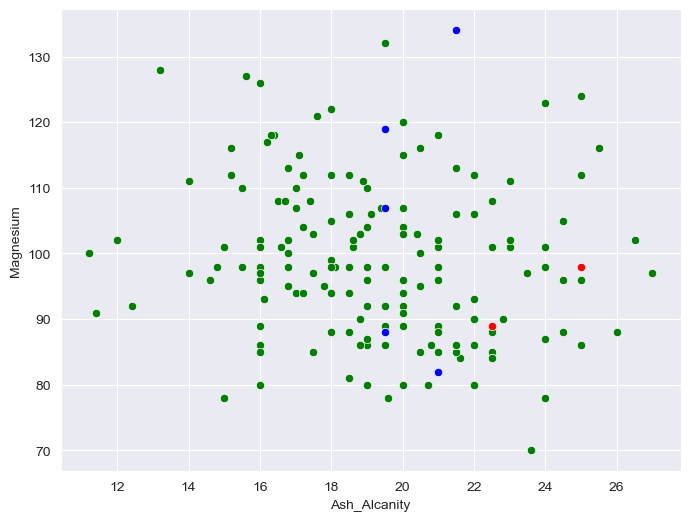

In [91]:
df1=df[df['DBSCAN_cluster']==0]
df2=df[df['DBSCAN_cluster']==1]
df3=df[df['DBSCAN_cluster']==-1]
#scatter Plot

plt.figure(figsize=(8, 6))

sns.scatterplot(x='Ash_Alcanity', y='Magnesium', data=df1, color='green')
sns.scatterplot(x='Ash_Alcanity', y='Magnesium', data=df2, color='red')
sns.scatterplot(x='Ash_Alcanity', y='Magnesium', data=df3, color='blue')
plt.xlabel('Ash_Alcanity')
plt.ylabel('Magnesium')
plt.show()

In [92]:
#Retrieves the cluster lables predicted by DBSCAN algorithm and stores in variable y_dbscan
y_dbscan=dbscan.labels_

#calculates number of unique cluster labels in y_dbscan.Set() is used to remove duplicate cluster labels.len() is used to count the number of remaining unique labels.

len(set(y_dbscan))

3

In [93]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753


In [94]:
#Calculating Silhouette score

from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(scaled_data,y_dbscan)
silhouette_avg

0.041986786978990144